In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data

In [2]:
observations = 1000

# Randomly create 2 input variables
xs = np.random.uniform(low=-10,high=10,size=(observations,1)) # each number has equal chance of being picked
zs = np.random.uniform(low=-10,high=10,size=(observations,1)) # each number has equal chance of being picked

# Column stack takes sequence of 1D arrays and stacks into 2D array
inputs = np.column_stack((xs,zs))

# Matrix of n x k - where n is observation and k is number of input variables
print(inputs.shape)

(1000, 2)


## Create targets

In [3]:
noise = np.random.uniform(-1, 1, (observations,1)) #Random noise to add to data for exercise

# Define our function as 2x + 3z + 5 (with noise)
targets = 2*xs - 3*zs + 5 + noise 
print(targets.shape)

(1000, 1)


## Plot training data

We want to see a strong trend that our model should learn to reproduct

(1000,)


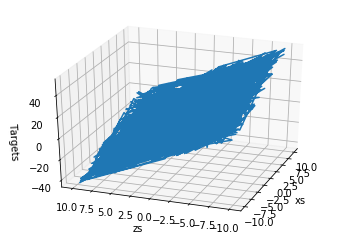

In [4]:
targets = targets.reshape(observations,) # turn into 1D array
print(targets.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=200) # Change angle you view chart with
plt.show()
targets = targets.reshape(observations, 1)

## Initialise variables

In [18]:
weights = np.random.uniform(-0.1, 0.1, size=(2,1)) # 2 variables, 1 output

biases = np.random.uniform(-0.1, 0.1, size=1) #Bias is a scalar as there is only 1 output

## Set learning rate

In [19]:
learning_rate = 0.04

## Train model

In [20]:
for i in range(1000):
    # 1: Model
    outputs = np.dot(inputs, weights) + biases # 1000x2 matrix dot 2x1 matrix, and element wise addition of bias
    deltas = outputs - targets # 1000x1 matrix
    
    # 2: Objective function
    
    # We are considering the L2-norm loss, but divided by 2, so it is consistent with the lectures.
    # Moreover, we further divide it by the number of observations.
    # This is simple rescaling by a constant. We explained that this doesn't change the optimization logic,
    # as any function holding the basic property of being lower for better results, and higher for worse results
    # can be a loss function.
    loss=np.sum(deltas**2) / 2 / observations
    
    if i%10 == 0:
        print(loss)
    
    # Another small trick is to scale the deltas the same way as the loss function
    # In this way our learning rate is independent of the number of samples (observations).
    # Again, this doesn't change anything in principle, it simply makes it easier to pick a single learning rate
    # that can remain the same if we change the number of training samples (observations).
    deltas_scaled = deltas/observations # Delta per observation
    
    # 3: Optimisation algorithm
    
    # dot product (sum) of 2x1000 TRANSPOSED inputs and 1000x1 deltas
    # Transposing allows dot product, the information held in the matrices is the same!
    weights = weights - learning_rate * np.dot(inputs.T, deltas_scaled) # Sum of x * deltas times eta
    
    biases = biases - learning_rate * np.sum(deltas_scaled) # Sum of deltas times eta

227.11177382372824
5.813014146805876
2.666341499435196
1.2714890300774981
0.653180822278767
0.3790980441858812
0.257603022286436
0.20374688273233332
0.17987361021198614
0.16929110011101198
0.16460010016780052
0.16252068042170603
0.16159891821049444
0.16119032077574694
0.16100919828921884
0.16092891057241918
0.16089332074813792
0.16087754454172848
0.16087055128751337
0.16086745132778613
0.1608660771820716
0.16086546805272445
0.16086519803873858
0.16086507834732508
0.16086502529068653
0.16086500177181562
0.16086499134640414
0.16086498672504262
0.16086498467649216
0.16086498376841363
0.16086498336588187
0.16086498318744816
0.16086498310835237
0.16086498307329083
0.16086498305774888
0.16086498305085942
0.16086498304780542
0.16086498304645167
0.16086498304585156
0.1608649830455856
0.1608649830454677
0.16086498304541538
0.16086498304539226
0.16086498304538194
0.16086498304537739
0.16086498304537541
0.16086498304537453
0.1608649830453741
0.16086498304537394
0.1608649830453739
0.16086498304537

## Print weights & biases

In [21]:
print(weights, biases)

[[ 2.00371075]
 [-3.00352821]] [5.01062142]


## Plot last outputs vs. targets

At the end of our iterations, we want a 45 degree line!

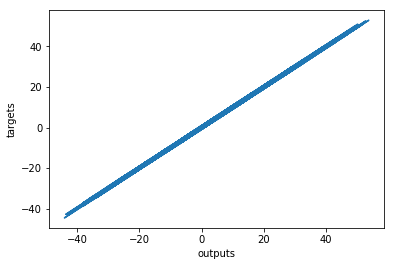

In [22]:
plt.plot(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()